In [487]:
import os
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt

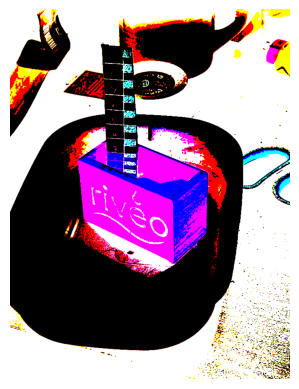

In [488]:
#Acquisition et pré-traitement

# 1. Lecture de la vidéo
#imagPath = "../../data/4/IMG_8518.png"
#imagPath = "../../data/3/3.png"
imagPath = "../../data/3/32.png"
img2 = cv2.imread(imagPath, cv2.COLOR_BGR2RGB)
img = cv2.imread(imagPath, cv2.IMREAD_GRAYSCALE)
orig = img2.copy()



_, bw = cv2.threshold(img2, 100, 255, cv2.THRESH_BINARY_INV)
#_, bw = cv2.threshold(img, 125, 190, cv2.THRESH_BINARY_INV)
plt.imshow(bw)
plt.axis("off")
plt.show()


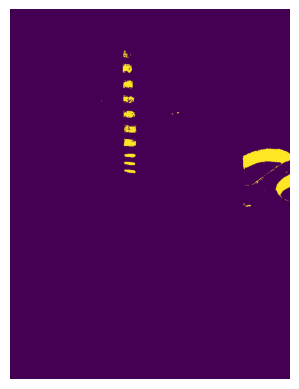

In [489]:
hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

# Définis la plage de bleu (valeurs à ajuster selon ta nuance)
lower_blue = np.array([90, 80, 20])
upper_blue = np.array([140, 255, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)

plt.imshow(mask)
plt.axis("off")
plt.show()

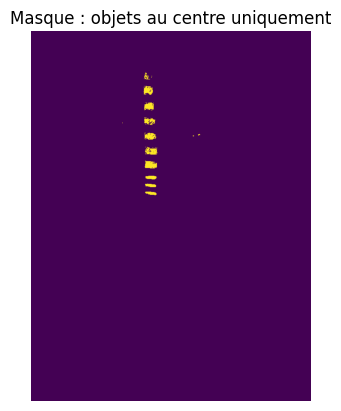

In [493]:
# -------- Garder seulement le centre --------
h, w = mask.shape
frac = 0.5  # fraction du centre à garder (0.5 = 50%)
w0 = int(w * (0.5 - frac / 2))
w1 = int(w * (0.5 + frac / 2))
h0 = int(h * (0.5 - 0.8 / 2))
h1 = int(h * (0.5 + 0.8 / 2))

center_mask = np.zeros_like(mask)
center_mask[h0:h1, w0:w1] = 255

mask_centre = cv2.bitwise_and(mask, center_mask)

plt.imshow(mask_centre)
plt.title("Masque : objets au centre uniquement")
plt.axis("off")
plt.show()

Nombre de petits carrés bleus détectés : 10
Nombre de groupes fusionnés : 10


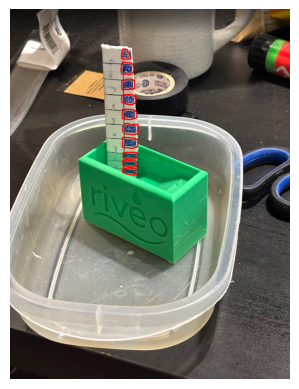

In [494]:
contours, _ = cv2.findContours(mask_centre, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

petits_bleus = [c for c in contours if 60 < cv2.contourArea(c) < 1000]  # adapte les seuils à ta taille de carrés

print(f"Nombre de petits carrés bleus détectés : {len(petits_bleus)}")


fusion = np.zeros_like(mask_centre)
cv2.drawContours(fusion, petits_bleus, -1, 255, thickness=cv2.FILLED)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))  # ajuste la taille selon l'espacement réel
fusion = cv2.dilate(fusion, kernel, iterations=1)

contours_fusionnes, _ = cv2.findContours(fusion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Nombre de groupes fusionnés : {len(contours_fusionnes)}")


# Optionnel : visualise-les sur l'image
output = img2.copy()
cv2.drawContours(output, contours_fusionnes, -1, (0,0,255), 2)

import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
